In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

1. Create a random list of number and then save it to a text file named "simple_data.txt"

In [ ]:
data= np.random.random(10)   ## 10 random numbers between 0 and 1     #random.random() doesn’t work (for a matrix)
np.savetxt("simple_data.txt",data)

2. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [ ]:
datt = np.random.rand(5,5)     #random.rand   Can create multi-dimensional data (matrix)
np.savetxt("data.txt",datt)

3. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [ ]:
# Path to the input text file
input_file = r"C:\Users\hassa\data.txt"   

# Path to the output CSV file
output_file = r"C:\Users\hassa\data.csv"

# Open the text file for reading and the CSV file for writing
with open(input_file, 'r') as fin, open(output_file, 'w') as fout:     ##fin → reads the .txt file
#fout → writes the .csv file        # with ensures files are closed automatically
    
    for line in fin:      #Each line represents one row of the matrix.
        
        # Remove extra spaces and split values
        values = line.strip().split() 
        #split() → separates numbers by spaces  
        
        # Join values with commas (CSV format)
        csv_line = ",".join(values)     #strip() removes whitespace from the beginning and the end of a string.  # join() → combines them using commas This is exactly what CSV format requires
        
        # Write the line to the CSV file
        fout.write(csv_line + "\n")

print("data.txt successfully converted to data.csv")


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [ ]:
# Path to binary file
input_file = r"C:\Users\hassa\credit_card.dat"

with open(input_file, "r") as f:
    for line in f:             #This reads the file line by line.
        line = line.strip()     # remove newline
        
        chars = []     #We create an empty list to store decoded characters.
        
        # Process the line in chunks of 10 bits
        for i in range(0, len(line), 10): #range(start, stop, step)   #This loops through the binary string in steps of 10 bits.    #i = 0, 10, 20, 30, ...
            block = line[i:i+10]          #Start index = i     End index = i+10 (exclusive)          Returns a new string  
            # 10-bit block   #This extracts one chunk of 10 bits from the line. 
            
            data_bits = block[:6]              
            # first 6 bits (real data)  #Example: block = "1010110011"     # data_bits = "101011" real part     #"0011" is ignored  padding
#defaults to 0      End = 6 (exclusive)      Returns first 6 characters   and remove 4
  
            
            # Convert binary to integer
            value = int(data_bits, 2)  # Base-2 (also known as Binary)
            #int(string, base)      #Converts a string to an integer base 2 which is binary        
            
            # Convert integer to character
            chars.append(chr(value))
        
        # Join characters into credit card number
        credit_card_number = "".join(chars)
        
        print(credit_card_number)


5. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [ ]:
import json
import csv

IN = "user_data.json"
OUT = "american_express_users.csv"

with open(IN, "r") as f:
    data = json.load(f)   #Reads the JSON text from the file and converts it into Python objects

with open(OUT, "w", newline="") as f:   #newline="" prevents extra blank lines in CSV on Windows.
    writer = csv.writer(f)   
    header_written = False

    for user in data:
        if user["CreditCardType"] == "American Express":
            if not header_written:
                writer.writerow(user.keys())
                header_written = True
            writer.writerow(user.values())

# hard one

6. Load the file from this url: https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 with Pandas.

Explore the data (see the info of the data)
Draw the istogram of the 'class' field. Decribe wath yuou see

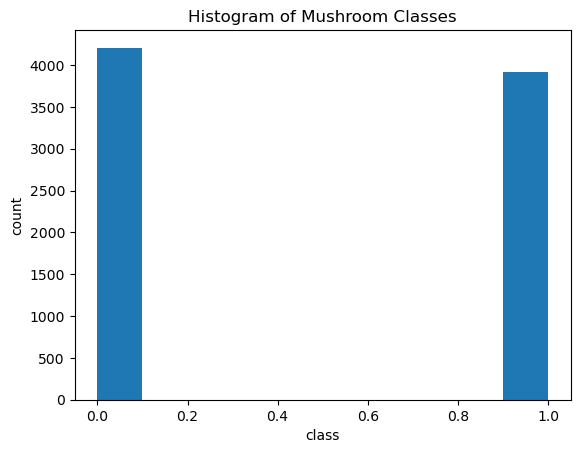

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
#  step 1 load data
import pandas as pd
file_6 = r"C:\Users\hassa\mushrooms_categorized.csv"
data = pd.read_csv(file_6, nrows=8124)    #reads a CSV file into a Pandas DataFrame  #nrows=8124 → read only 8124 rows

# next step Draw the istogram of the 'class' field
import matplotlib.pyplot as plt
plt.hist(data['class'])  #plt.hist() draws a histogram      # data['class'] selects the class column from the DataFrame

# Labels and title
plt.xlabel("class")
plt.ylabel("count")
plt.title("Histogram of Mushroom Classes")
plt.show()

7. Load the remote file https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1 with Pandas and plot a scatter plot all possible combination of the following fields:

features_1
features_2
features_3

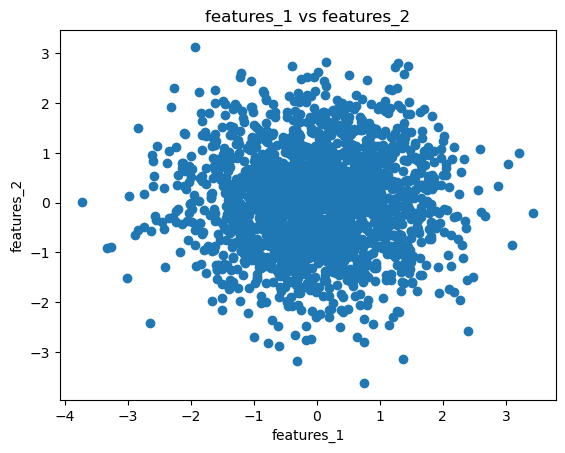

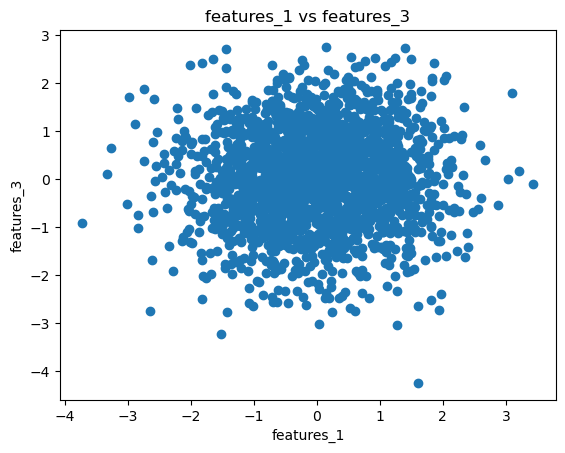

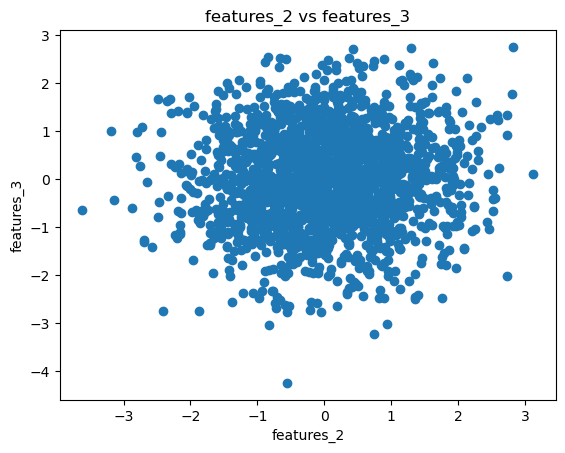

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1"
df = pd.read_csv(url)
pairs = [("features_1","features_2"), ("features_1","features_3"), ("features_2","features_3")]
for x, y in pairs:   #Loops through the list pairs
    plt.figure()
    plt.scatter(df[x], df[y])   # Takes column x from the DataFrame    # Takes column y from the DataFrame      # Draws a scatter plot
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.show()

8. Load the same file of point 6, and convert the file to json with Pandas.

In [ ]:
# Load the CSV file (same as point 6)
file_6 = r"C:\Users\hassa\mushrooms_categorized.csv"
df = pd.read_csv(file_6)

# Convert to JSON
df.to_json("mushrooms_categorized.json")